<a href="https://colab.research.google.com/github/anandhuarjuna/NLP/blob/main/Project_1_news_True_%26_Fake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
df_true=pd.read_csv('/content/True.csv')
df_fake=pd.read_csv('/content/Fake.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [55]:
df_true.drop(['subject','date'],axis=1,inplace=True)
df_true
df_fake.drop(['subject','date'],axis=1,inplace=True)
df_fake


,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...


In [56]:
df_true['Labels']=1
df_true
df_fake['Labels']=0
df_fake

,title,text,Labels
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [57]:
df=pd.concat([df_true,df_fake],ignore_index=True,axis=0)
df

,title,text,Labels
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


In [58]:
df.isna().sum()
df['Labels'].value_counts()

0    23481
1    21417
Name: Labels, dtype: int64

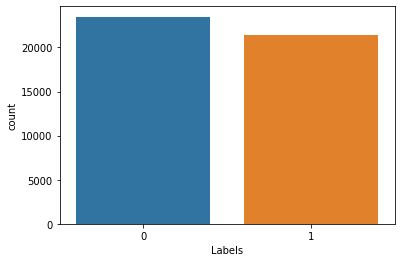

In [59]:
import seaborn as sns
sns.countplot(df['Labels'])

In [60]:
news1=df.title
news1=news1.str.replace('[^a-zA-Z0-9]+',' ')
news1
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
stem=SnowballStemmer('english')
news1=news1.apply(lambda x:[stem.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))


In [61]:
news2=df.text
news2=news2.str.replace('[^a-zA-Z0-9]+',' ')
news2=news2.apply(lambda x:[stem.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
train_vec=vect.fit_transform(news1,news2)
print(train_vec)

  (0, 10695)	0.4530097398985599
  (0, 4769)	0.41173466419632926
  (0, 12105)	0.27186087397011705
  (0, 4832)	0.39815733794564445
  (0, 10094)	0.20956973254037817
  (0, 7295)	0.3712458851844093
  (0, 4712)	0.2773641052169295
  (0, 2010)	0.30290429258698237
  (0, 1052)	0.20589877101772028
  (1, 9053)	0.3921621257770837
  (1, 8012)	0.436913941683376
  (1, 8622)	0.1651368568248086
  (1, 9916)	0.4567202854876303
  (1, 12357)	0.3804184227447259
  (1, 510)	0.39684507978952566
  (1, 12235)	0.11897253708305569
  (1, 7852)	0.3210806996910518
  (2, 6623)	0.32132274006557293
  (2, 5904)	0.2357665334300177
  (2, 3808)	0.31496152388576976
  (2, 8126)	0.3878607754913446
  (2, 8114)	0.4645527201886217
  (2, 7130)	0.35225680276268756
  (2, 10778)	0.23995268619785817
  (2, 10783)	0.3734416570299982
  :	:
  (44895, 12235)	0.08291960083857572
  (44896, 6564)	0.4614835107871373
  (44896, 382)	0.4010427031508938
  (44896, 698)	0.2995411432312616
  (44896, 9720)	0.31462431422034554
  (44896, 6023)	0.22886336

In [63]:
X=train_vec
y=df['Labels'].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=3)

SVC()
*******************
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      7025
           1       0.96      0.96      0.96      6445

    accuracy                           0.96     13470
   macro avg       0.96      0.96      0.96     13470
weighted avg       0.96      0.96      0.96     13470

*******************
MultinomialNB()
*******************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7025
           1       0.95      0.91      0.93      6445

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470

*******************
RandomForestClassifier()
*******************
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7025
           1       0.95      0.95      0.95      6445

    accuracy                       

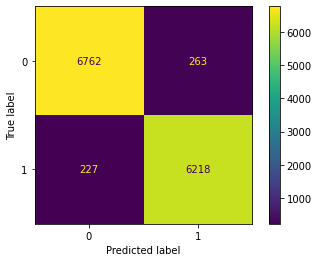

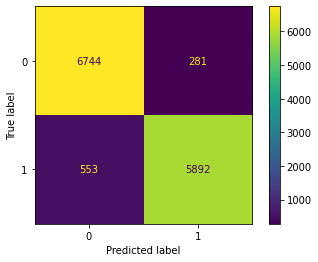

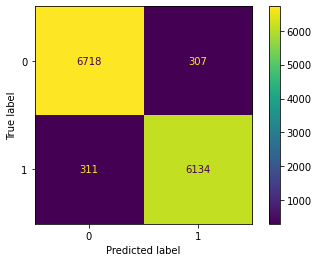

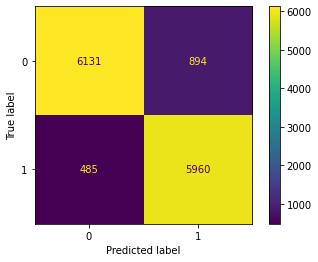

In [65]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svc=SVC()
mb=MultinomialNB()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
lst=[svc,mb,rf,ab]
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
for i in lst:
  print(i)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print('*******************')
  print(classification_report(y_test,y_pred))
  print('*******************')
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [68]:
y_fake=svc.predict(vect.transform([' Trump Said Some INSANELY Racist Stuff Inside The Oval Office, And Witnesses Back It Up']))
if y_fake==[0]:
  print('Fake news')
else:
  print('True news')

Fake news
